In [2]:
import sys
import pandas as pd
import sklearn
import keras
import numpy as np

In [3]:
# import the dataset
file = 'Autism-Child-Data.txt'

# read the csv
data = pd.read_table(file, sep = ',', index_col = None)

In [4]:
print(data.loc[0])

A1_Score                      1
A2_Score                      1
A3_Score                      0
A4_Score                      0
A5_Score                      1
A6_Score                      1
A7_Score                      0
A8_Score                      1
A9_Score                      0
A10_Score                     0
age                           6
gender                        m
ethnicity                Others
jundice                      no
austim                       no
contry_of_res            Jordan
used_app_before              no
result                        5
age_desc           '4-11 years'
relation                 Parent
Class                        NO
Name: 0, dtype: object


In [5]:
# Total number of records
n_records = len(data.index)

#Number of records where individual's with ASD
n_asd_yes = len(data[data['Class'] == 'YES'])

# Number of records where individual's with no ASD
n_asd_no = len(data[data['Class'] == 'NO'])

# Percentage of individuals whose are with ASD
yes_percent = float(n_asd_yes) / n_records *100

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals diagonised with ASD: {}".format(n_asd_yes))
print("Individuals not diagonised with ASD: {}".format(n_asd_no))
print("Percentage of individuals diagonised with ASD: {:.2f}%".format(yes_percent))

Total number of records: 292
Individuals diagonised with ASD: 141
Individuals not diagonised with ASD: 151
Percentage of individuals diagonised with ASD: 48.29%


In [6]:
asd_data = pd.read_table(file, sep = ',', index_col = None)

In [7]:
asd_data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,0.633562,0.534247,0.743151,0.551370,0.743151,0.712329,0.606164,0.496575,0.493151,0.726027,6.239726
std,0.482658,0.499682,0.437646,0.498208,0.437646,0.453454,0.489438,0.500847,0.500811,0.446761,2.284882
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


In [8]:
print(asd_data.dtypes)

A1_Score            int64
A2_Score            int64
A3_Score            int64
A4_Score            int64
A5_Score            int64
A6_Score            int64
A7_Score            int64
A8_Score            int64
A9_Score            int64
A10_Score           int64
age                object
gender             object
ethnicity          object
jundice            object
austim             object
contry_of_res      object
used_app_before    object
result              int64
age_desc           object
relation           object
Class              object
dtype: object


In [9]:
asd_data.dropna(inplace=True)
asd_data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,0.633562,0.534247,0.743151,0.551370,0.743151,0.712329,0.606164,0.496575,0.493151,0.726027,6.239726
std,0.482658,0.499682,0.437646,0.498208,0.437646,0.453454,0.489438,0.500847,0.500811,0.446761,2.284882
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


In [10]:
numerical = ['age', 'result']
asd_data = asd_data.replace('?', np.nan)  # Replace '?' with NaN
asd_data[numerical] = asd_data[numerical].astype(float)  # Convert to float
median_values = asd_data[numerical].median()  # Calculate the median


In [11]:
asd_data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,288.000000,292.000000
mean,0.633562,0.534247,0.743151,0.551370,0.743151,0.712329,0.606164,0.496575,0.493151,0.726027,6.354167,6.239726
std,0.482658,0.499682,0.437646,0.498208,0.437646,0.453454,0.489438,0.500847,0.500811,0.446761,2.365456,2.284882
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,6.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,10.000000


In [12]:
# Total number of records in clean dataset
n_records = len(asd_data.index)

# Number of records where individual's with ASD in the clean dataset
n_asd_yes = len(asd_data[asd_data['Class'] == 'YES'])

#Number of records where individual's with no ASD in the clean dataset
n_asd_no = len(asd_data[asd_data['Class'] == 'NO'])

print("Individuals diagonised with ASD: {}".format(n_asd_yes))
print("Individuals not diagonised with ASD: {}".format(n_asd_no))

Individuals diagonised with ASD: 141
Individuals not diagonised with ASD: 151


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", color_codes=True)

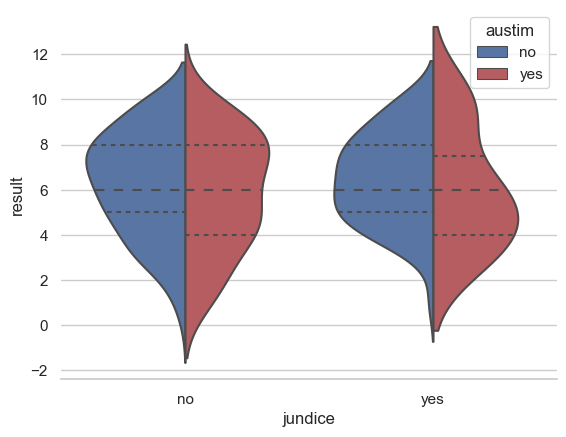

In [14]:
sns.violinplot(x="jundice", y="result", hue="austim", data=asd_data, split=True,
                inner="quart", palette={'yes': "r", 'no': "b"})
sns.despine(left=True)

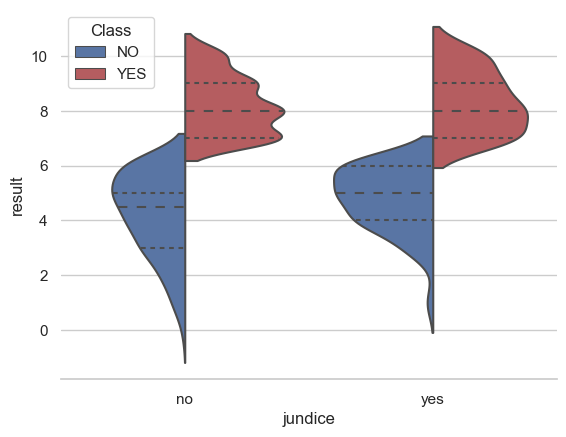

In [15]:
sns.violinplot(x="jundice", y="result", hue="Class", data=asd_data, split=True,
                inner="quart", palette={'YES': "r", 'NO': "b"})
sns.despine(left=True)


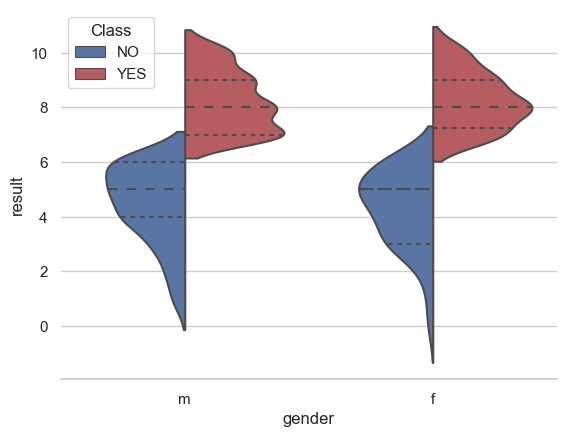

In [16]:
sns.violinplot(x="gender", y="result", hue="Class", data=asd_data, split=True,
                inner="quart", palette={'YES': "r", 'NO': "b"})
sns.despine(left=True)

In [17]:
asd_raw = asd_data['Class']
features_raw = asd_data[['age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'result',
                      'relation','A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score',
                      'A9_Score','A10_Score']]

In [18]:
asd_data.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class'],
      dtype='object')

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()
numerical = ['age','result']
feature_minmax_transform = pd.DataFrame(data = features_raw)
feature_minmax_transform[numerical] = scaler.fit_transform(features_raw[numerical])

In [21]:
display(feature_minmax_transform.head(n = 5))

,age,gender,ethnicity,jundice,austim,contry_of_res,result,relation,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,0.285714,m,Others,no,no,Jordan,0.5,Parent,1,1,0,0,1,1,0,1,0,0
1,0.285714,m,'Middle Eastern ',no,no,Jordan,0.5,Parent,1,1,0,0,1,1,0,1,0,0
2,0.285714,m,NaN,no,no,Jordan,0.5,NaN,1,1,0,0,0,1,1,1,0,0
3,0.142857,f,NaN,yes,no,Jordan,0.4,NaN,0,1,0,0,1,1,0,0,0,1
4,0.142857,m,Others,yes,no,'United States',1.0,Parent,1,1,1,1,1,1,1,1,1,1


In [22]:
features_final = pd.get_dummies(feature_minmax_transform)
features_final = features_final.replace([np.inf, -np.inf], np.nan)  # Replace inf values with NaN
features_final = features_final.astype(float)  # Convert to float
features_final = features_final.dropna()  # Remove rows with NaN values
features_final = features_final.astype(int)  # Convert to integer
display(features_final.head(5))


,age,result,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,...,contry_of_res_Romania,contry_of_res_Russia,contry_of_res_Sweden,contry_of_res_Syria,contry_of_res_Turkey,relation_'Health care professional',relation_Parent,relation_Relative,relation_Self,relation_self
0,0,0,1,1,0,0,1,1,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,0,1,1,0,0,1,1,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0


In [23]:
asd_classes = asd_raw.apply(lambda x: 1 if x == 'YES' else 0)



# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
list(encoded)

85 total features after one-hot encoding.


['age',
 'result',
 'A1_Score',
 'A2_Score',
 'A3_Score',
 'A4_Score',
 'A5_Score',
 'A6_Score',
 'A7_Score',
 'A8_Score',
 'A9_Score',
 'A10_Score',
 'gender_f',
 'gender_m',
 "ethnicity_'Middle Eastern '",
 "ethnicity_'South Asian'",
 'ethnicity_Asian',
 'ethnicity_Black',
 'ethnicity_Hispanic',
 'ethnicity_Latino',
 'ethnicity_Others',
 'ethnicity_Pasifika',
 'ethnicity_Turkish',
 'ethnicity_White-European',
 'jundice_no',
 'jundice_yes',
 'austim_no',
 'austim_yes',
 "contry_of_res_'Costa Rica'",
 "contry_of_res_'Isle of Man'",
 "contry_of_res_'New Zealand'",
 "contry_of_res_'Saudi Arabia'",
 "contry_of_res_'South Africa'",
 "contry_of_res_'South Korea'",
 "contry_of_res_'U.S. Outlying Islands'",
 "contry_of_res_'United Arab Emirates'",
 "contry_of_res_'United Kingdom'",
 "contry_of_res_'United States'",
 'contry_of_res_Afghanistan',
 'contry_of_res_Argentina',
 'contry_of_res_Armenia',
 'contry_of_res_Australia',
 'contry_of_res_Austria',
 'contry_of_res_Bahrain',
 'contry_of_res_

In [24]:
asd_classes

0      0
1      0
2      0
3      0
4      1
      ..
287    1
288    0
289    1
290    1
291    0
Name: Class, Length: 292, dtype: int64

Text(0, 0.5, 'Frequency')

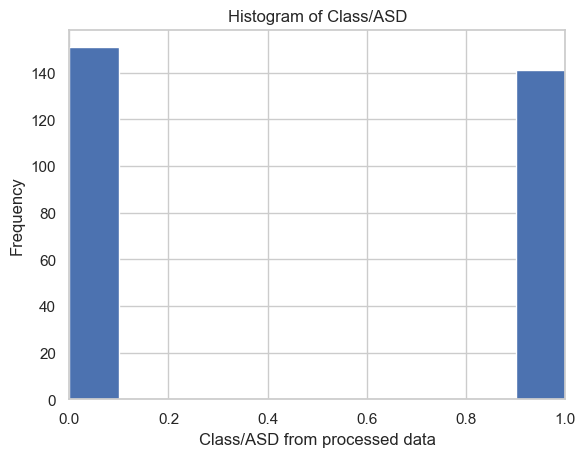

In [25]:
# 8 bins
plt.hist(asd_classes, bins=10)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of Class/ASD')
plt.xlabel('Class/ASD from processed data')
plt.ylabel('Frequency')

In [26]:
print("features_final shape:", features_final.shape)
print("asd_classes shape:", asd_classes.shape)


features_final shape: (288, 85)
asd_classes shape: (292,)


In [27]:
asd_classes = asd_classes[:288]

In [28]:
from sklearn.model_selection import train_test_split

np.random.seed(1234)

X_train, X_test, y_train, y_test = train_test_split(features_final, asd_classes, train_size=0.80, random_state=1)


# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 230 samples.
Testing set has 58 samples.


In [29]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier(random_state=1)

# Train the classifier on the training set
dectree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [32]:
import pydotplus 
from IPython.display import Image 
from sklearn.tree import export_graphviz
from sklearn import tree

In [36]:
dot_data = tree.export_graphviz(dectree,
                                out_file=None,
                                filled=True,
                                rounded=True,
                                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  



In [37]:
y_pred_class = dectree.predict(X_test)

In [38]:
print('True:', y_test.values[0:25])
print('False:', y_pred_class[0:25])

True: [1 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0]
False: [0 1 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0]


In [39]:
from sklearn import metrics

In [40]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[13 17]
 [15 13]]
